In [1]:
##Option1 is the script where we divided the training set into train and validation set


# Loading required libraries:
## Sklearn modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

###modules for preprocessing, training, test data and validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
## Classification
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

##PLotting modules
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv("Iris_Data.csv")
data.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## data shape
row, columns = data.shape 
print ('Number of rows', row)
print ('Number of columns', columns)

Number of rows 150
Number of columns 5


In [4]:
# Data descriptions 
print(data.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


In [5]:
#data types
print (data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [6]:
##copying data
data_copy= data.copy(deep=True)

In [7]:
# Coulumn with categorical values
data_size=data_copy.groupby('species').size()
print ('Column name', 'species', ':', data_size)

Column name species : species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


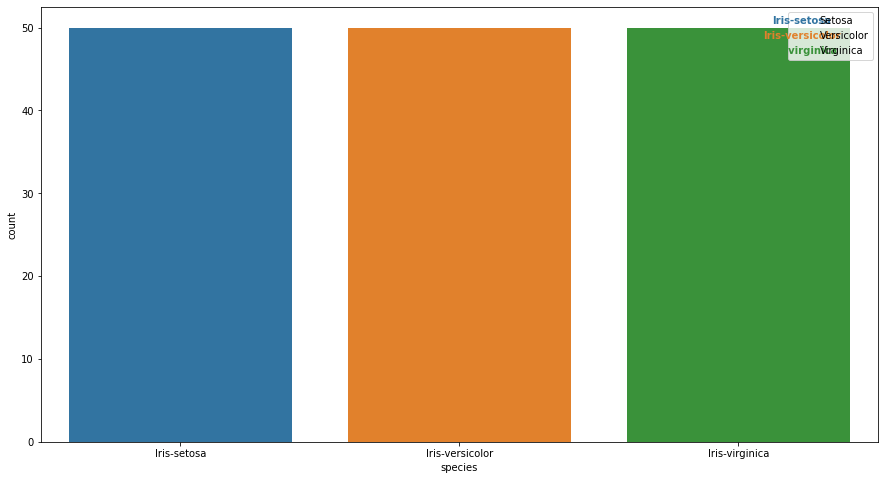

In [8]:
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
## Bar plot for Column diagnosis
sns.set_style()
plt.figure(figsize=(15,8))
ax=sns.countplot(x='species',data=data_copy)
textname= "Iris-setosa Iris-versicolor Iris-virginica".split()
labels= "Setosa Versicolor Virginica".split()
t = ax.get_xticklabels()
labeldic = dict(zip(textname, labels))
labels = [labeldic[h.get_text()]  for h in t]
# print (labels)
# handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
handles_list=[]
for h,c in zip(t,ax.patches):
    handles = h.get_text(),c.get_fc()
    handles_list.append(handles)



ax.legend(handles_list, labels, handler_map={tuple : TextHandler()}) 
plt.show()

In [9]:
## creating training and test data set
x = data_copy.drop(columns= 'species')

y= data_copy['species']

In [10]:
print (data_copy.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [11]:
#scaling the values using Standard Scalar Library
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print (pd.DataFrame(x, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']))

     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
5       -0.537178     1.957669     -1.170675    -1.050031
6       -1.506521     0.800654     -1.341272    -1.181504
7       -1.021849     0.800654     -1.284407    -1.312977
8       -1.748856    -0.356361     -1.341272    -1.312977
9       -1.143017     0.106445     -1.284407    -1.444450
10      -0.537178     1.494863     -1.284407    -1.312977
11      -1.264185     0.800654     -1.227541    -1.312977
12      -1.264185    -0.124958     -1.341272    -1.444450
13      -1.870024    -0.124958     -1.511870    -1.444450
14      -0.052506     2.189072     -1.455004    -1.312977
15      -0.173674     3.114684     -1.284407    -1.050031
16      -0.537

In [12]:
#Spliting test datase as 30%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 
print ('x_train:',len(x_train))
print ('x_test:',len(x_test))
print ('y_train:',len(y_train))
print ('y_test:',len(y_test))

x_train: 105
x_test: 45
y_train: 105
y_test: 45


[0.9336363636363638, 0.9327272727272728, 0.9627272727272727, 0.9436363636363637, 0.9427272727272727, 0.9427272727272727, 0.9518181818181818, 0.9518181818181819, 0.9145454545454547, 0.9336363636363636, 0.9345454545454546, 0.9245454545454546, 0.9254545454545454, 0.8772727272727273, 0.8590909090909091]
The maximum cross validation score is 0.9627272727272727 at K = 5
The minimum error rate is 0.037272727272727346 at K = 5


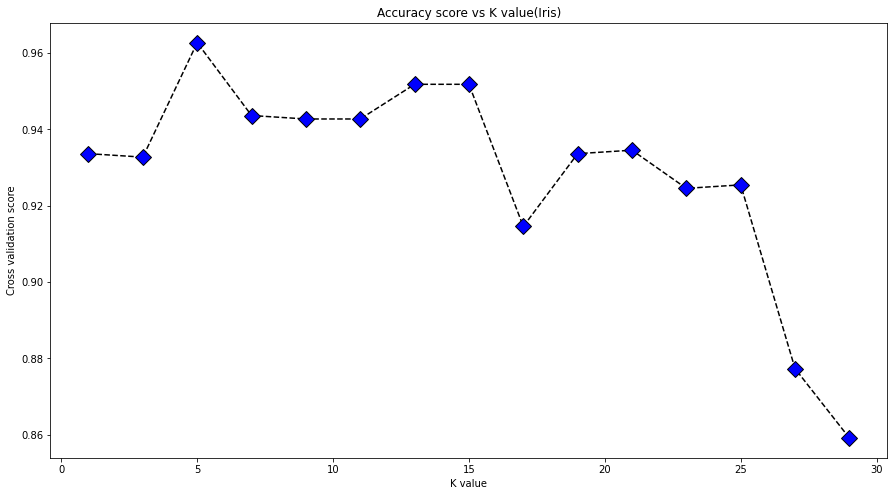

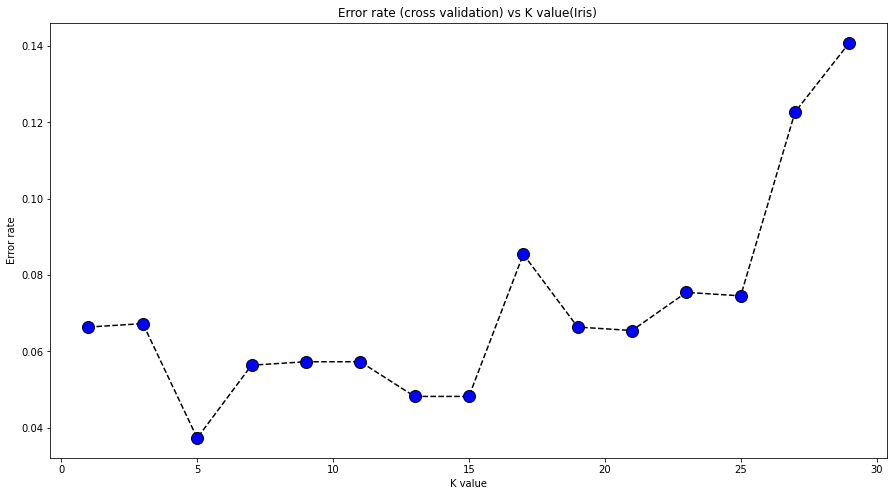

In [13]:
## KNN cross validation for K value
For_graph={}
cross_valscores_list=[]
error_rate_list = []
k_number=[]
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i, weights= 'uniform', algorithm = 'auto')
    cross_val= cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cross_valscores_list.append(cross_val.mean())
    error_rate_list.append(1-cross_val.mean())
    cross_valscores_dictdata= (i,cross_val.mean(),1-cross_val.mean(),'Iris')
    k_number.append(i)
    For_graph.setdefault('Iris', []).append(cross_valscores_dictdata)




print (cross_valscores_list)

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), cross_valscores_list, color = 'black', linestyle='dashed', marker = 'D', markerfacecolor = 'blue', markersize = 12)

plt.title('Accuracy score vs K value(Iris)')
plt.xlabel('K value')
plt.ylabel('Cross validation score')

print ("The maximum cross validation score is {} at K = {}".format(max(cross_valscores_list), k_number[cross_valscores_list.index(max(cross_valscores_list))]))


plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), error_rate_list, color = 'black', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize = 12)

plt.title('Error rate (cross validation) vs K value(Iris) ')
plt.xlabel('K value')
plt.ylabel('Error rate')

print ("The minimum error rate is {} at K = {}".format(min(error_rate_list),  k_number[error_rate_list.index(min(error_rate_list))]))
iris_df=pd.DataFrame(For_graph)
#Diabetes_df
#Diabetes_df.to_excel('Diabetes_df.xlsx')
iris_df.to_excel("iris_df.xlsx",sheet_name='Sheet_name_1')  




uniform
The selected optimum K is: 5
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


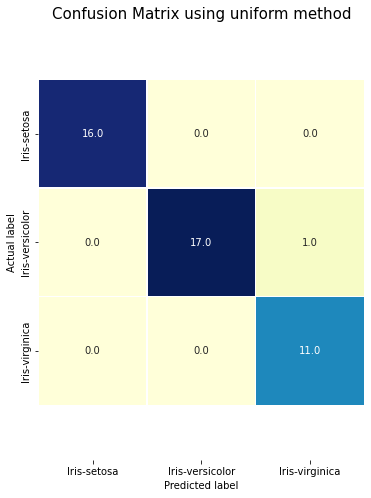

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

****
distance
The selected optimum K is: 5
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


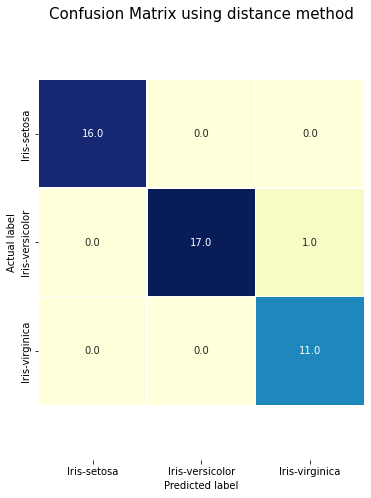

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

****


In [15]:
## selecting K  from cross validation
for weights in ["uniform", "distance"]:
    print (weights)
    selected_k= k_number[error_rate_list.index(min(error_rate_list))]
    print ('The selected optimum K is:',selected_k)
    knn_neighnour=KNeighborsClassifier(n_neighbors=selected_k, weights= weights, algorithm = 'auto')
    knn_neighnour.fit(x_train, y_train)
    y_predict = knn_neighnour.predict(x_test)
    print(confusion_matrix(y_test,y_predict))
    cm= confusion_matrix(y_test,y_predict)
    df = pd.DataFrame(cm, index= ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    
    plt.figure(figsize=(15,8))
    sns.heatmap(df, annot = True, cbar = False, fmt = '.1f', linewidths = .3, square = True, cmap='YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix using {} method'.format(weights), size = 15 );
    b,t = plt.ylim()
    b += 0.5
    t-= 0.5
    plt.ylim(b,t)
    plt.show()
    
    
    
    print(classification_report(y_test,y_predict))  
    print ('*'*4)
    